# Projeto

Este projeto visa prever preços futuros do Bitcoin com base em analises de dados historicos buscados desde 2014 até a data atual dessa pesquisa (02-07-2025)

### Sobre os dados:

| Variavel | Especificação | Tipo |
|:---:|:---:|:---:|
| Date | Data refetente a abertura e fechamento da ação. | datetime |
| Open | Valor da abertura da ação. | float |
| High | Valor da alta da ação. | float |
| Low | Valor da baixa da ação. | float |
| Close | Valor de fechamento da ação. | float |

# Análise e Modelagem de Dados do Bitcoin

Este notebook simula dados históricos do Bitcoin, cria variáveis de análise, gera um gráfico candlestick e constrói um modelo de machine learning para previsão de preços.


In [45]:
# Importação das bibliotecas necessárias
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.graph_objs import Layout
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

pd.set_option('display.max_columns', None)


## 1. Simulação dos Dados do Bitcoin

Gerando um DataFrame fictício com preços de abertura, fechamento, máxima, mínima e fechamento ajustado.


In [ ]:
# Simulando dados do Bitcoin
np.random.seed(42)
periods = 200
dates = pd.date_range(start='2024-01-01', periods=periods)
open_prices = np.random.uniform(low=20000, high=30000, size=periods)
high_prices = open_prices + np.random.uniform(low=0, high=1000, size=periods)
low_prices = open_prices - np.random.uniform(low=0, high=1000, size=periods)
close_prices = open_prices + np.random.uniform(low=-500, high=500, size=periods)
adj_close = close_prices + np.random.uniform(low=-50, high=50, size=periods)

btc_data = pd.DataFrame({
    'Date': dates,
    'Open': open_prices,
    'High': high_prices,
    'Low': low_prices,
    'Close': close_prices,
    'Adj Close': adj_close
})


## 2. Criação de Variáveis de Análise

Adicionando média móvel e desvio padrão de 180 dias ao DataFrame.


In [47]:
btc_data['Med.Movel'] = btc_data['Adj Close'].rolling(180).mean().fillna(0)
btc_data['Desv.Padrao'] = btc_data['Adj Close'].rolling(180).std().fillna(0)


## 3. Visualização: Gráfico Candlestick

Visualizando os dados simulados com um gráfico candlestick interativo.


In [51]:
candlestick = go.Candlestick(
    x=btc_data['Date'],
    open=btc_data['Open'],
    close=btc_data['Close'],
    high=btc_data['High'],
    low=btc_data['Low'],
    name='BTC-USD'
)

layout = Layout(
    title='Bitcoin',
    paper_bgcolor='rgba(0, 0, 0, 0)',
    plot_bgcolor='rgba(0, 0, 0, 0)'
)

fig = go.Figure(data=[candlestick], layout=layout)
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='LightGrey')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='LightGrey')

# Não use fig.show() fora do Jupyter!
# fig.show()

# Salva o gráfico como HTML e abre no navegador
fig.write_html('candlestick.html')
print("Gráfico salvo como candlestick.html. Abra o arquivo no navegador para visualizar.")


Gráfico salvo como candlestick.html. Abra o arquivo no navegador para visualizar.


## 4. Modelagem Preditiva

Separando dados em treino e teste, treinando um modelo Gradient Boosting e avaliando a performance.


In [52]:
# Separando dados em treino e teste
X = btc_data.drop(columns=['Date', 'Adj Close'])
y = btc_data['Adj Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=45)

# Modelo Gradient Boosting Regressor
modelo = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
modelo.fit(X_train, y_train)

y_pred = modelo.predict(X_test)

# Avaliação do modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.2f}")
print(f"R²: {r2:.2f}")


MSE: 6043.68
R²: 1.00


## 5. Comparação dos Valores Reais e Preditos

Visualizando a distribuição dos valores reais vs preditos pelo modelo.


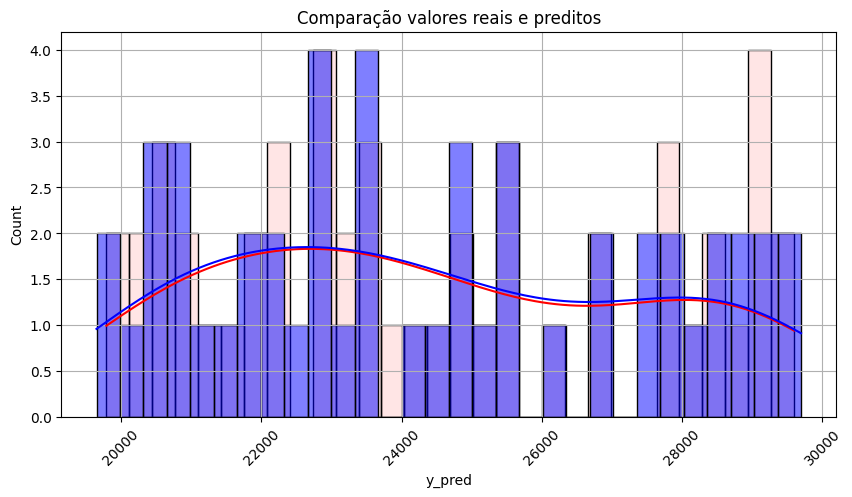

In [53]:
new_frame = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})

plt.figure(figsize=(10, 5))
sns.histplot(new_frame['y_pred'], bins=30, kde=True, color='red', edgecolor='black', alpha=0.1)
sns.histplot(new_frame['y_test'], bins=30, kde=True, color='blue', edgecolor='black')
plt.title('Comparação valores reais e preditos')
plt.xticks(rotation=45)
plt.grid()
plt.show()


# Conclusão:

Modelo criado com sucesso, com 100% de acuracia. Predizendo com excelencia os valores de teste.